## Car Price Prediction with Random Forest - Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
#pd.set_option('display.width', 1000)
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df=pd.read_csv(r"C:\Users\serda\Desktop\SD RECOVERY\DATA SCIENCE\ML\car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
df["vehicle_age"]=2023-df.Year

# We convert the vehicle production year in our data into age featurune.

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [10]:
df.select_dtypes("object").head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [11]:
for i in df.select_dtypes("object"):

    print(i, len(df[i].value_counts()))

# we see how many unique observations the categorical featurettes consist of. 
# The number of unique categorical observations of car_name is very high compared to the total number of observations in our data.

Car_Name 98
Fuel_Type 3
Seller_Type 2
Transmission 2


In [12]:
df.Car_Name.value_counts()

Car_Name
city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3

In [13]:
df.drop(columns=["Car_Name","Year"], inplace=True)

# Although I have 301 observations, there are 98 unique car/engine brands in car_name. 
# Applying an ordinal encoder to this feature to convert it to numeric data would not be a sensible course of action. 
# Because the DT model tends to give more importance to high cardinality categorical features (features with a lot of unique categorical observations). 
# This causes these features to be more prominent in feature importance. 
# There are also 1-2 pieces of most brands and models. Naturally, we remove this featura since it will not contribute to education.
# Since we have also converted the Year feature, which is the year of vehicle production, into the Age feature, we remove the Year featuren together with car_name.

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [15]:
s =df.select_dtypes("number").corr()

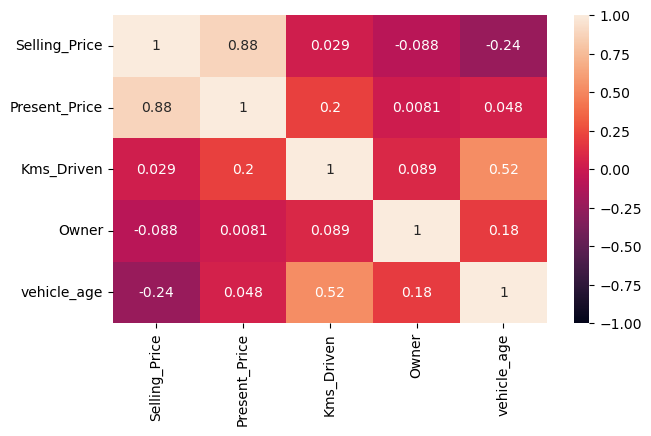

In [16]:
sns.heatmap(df.select_dtypes("number").corr(), annot=True, vmin=-1, vmax=1)
plt.show()

<Axes: xlabel='Selling_Price', ylabel='Count'>

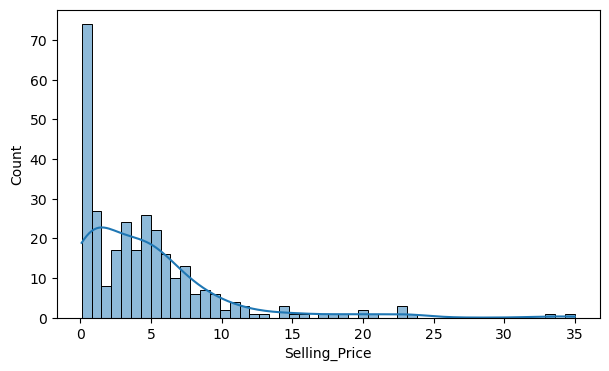

In [17]:
sns.histplot(df.Selling_Price, bins=50, kde=True)

# tree based models are very robust against outliers. However, this is not the case for small regression data.
# In small regression data, outlier distributions significantly change the average prices in the leaves where they fall. 
# Reducing these outlier observations, which are insufficient for training, is important in tree-based models.
# But as always, we should compare the scores both with and without outliers to see the differences.

<Axes: ylabel='Selling_Price'>

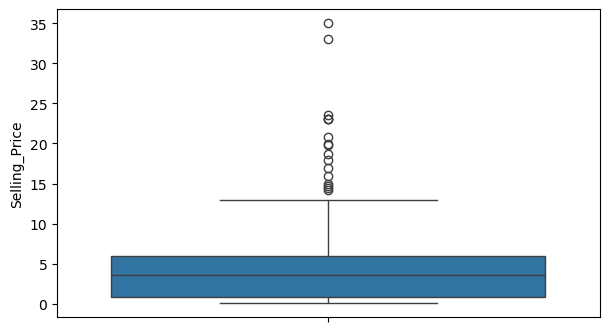

In [18]:
sns.boxplot(df.Selling_Price)

## Train test split

In [19]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 7)
Train target shape   :  (240,)
Test features shape  :  (61, 7)
Test target shape    :  (61,)


## Modeling with Pipeline

In [21]:
cat = X.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), 
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestRegressor(random_state=101))])

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae": mean_absolute_error(y_train, y_train_pred),
    "mse": mean_squared_error(y_train, y_train_pred, squared=True),
    "rmse": mean_squared_error(y_train, y_train_pred, squared=False),
    "mape": mean_absolute_percentage_error(y_train, y_train_pred)
   },

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae": mean_absolute_error(y_test, y_pred),
    "mse": mean_squared_error(y_test, y_pred, squared=True),
    "rmse": mean_squared_error(y_test, y_pred, squared=False),
    "mape": mean_absolute_percentage_error(y_test, y_pred)
    }}
    
    return pd.DataFrame(scores)

In [25]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

# It seems like there is overfiting

,train,test
R2,0.985171,0.958367
mae,0.255761,0.635857
mse,0.392032,0.959041
rmse,0.626125,0.979307
mape,0.068173,0.164984


In [26]:
from sklearn.model_selection import cross_validate

operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]
# we are validating overfiting

test_r2                                     0.884656
train_r2                                    0.982402
test_neg_mean_absolute_error               -0.717764
train_neg_mean_absolute_error              -0.281808
test_neg_mean_squared_error                -3.158051
train_neg_mean_squared_error               -0.464204
test_neg_root_mean_squared_error           -1.519154
train_neg_root_mean_squared_error          -0.679088
test_neg_mean_absolute_percentage_error    -0.192937
train_neg_mean_absolute_percentage_error   -0.070945
dtype: float64

## Removing Outliers

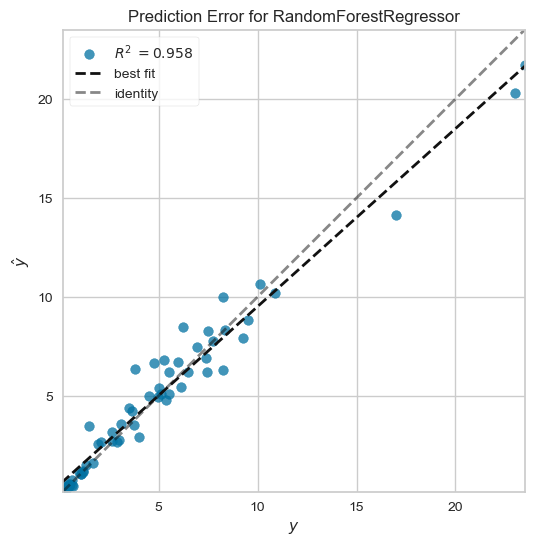

In [27]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 600))

model = pipe_model
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# We have seen that prices greater than #10 have distorted forecasts.

In [28]:
len(df[df.Selling_Price > 10])

28

In [29]:
28/301

0.09302325581395349

In [30]:
df_new = df[df.Selling_Price < 10]
df_new.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [31]:
X = df_new.drop(columns="Selling_Price")
y = df_new.Selling_Price

# We reassigned our x and y again according to the filtered data.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# we split our filtered data into train and test sets

In [33]:
operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestRegressor(random_state=101))])

In [34]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

# overfiting still seems to exist. Let's confirm with CV.

,train,test
R2,0.993047,0.928766
mae,0.142072,0.454485
mse,0.050617,0.475492
rmse,0.224983,0.689559
mape,0.058024,0.162754


In [35]:
operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestRegressor(random_state=101))]

model = Pipeline(steps=operations)


scores = cross_validate(model,
                        X_train,
                        y_train, 
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

# we confirmed that there is overfiting.

test_r2                                     0.934574
train_r2                                    0.991314
test_neg_mean_absolute_error               -0.385984
train_neg_mean_absolute_error              -0.150394
test_neg_mean_squared_error                -0.431424
train_neg_mean_squared_error               -0.063155
test_neg_root_mean_squared_error           -0.629533
train_neg_root_mean_squared_error          -0.250860
test_neg_mean_absolute_percentage_error    -0.157800
train_neg_mean_absolute_percentage_error   -0.059964
dtype: float64

## Visualizing trees

In [36]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features = list(features)
features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'vehicle_age']

In [37]:
from sklearn.tree import plot_tree

def report_model(model, number_of_tree):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(15,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree], filled=True, feature_names=features, fontsize=8);



         train      test
R2    0.928861  0.892493
mae   0.473189  0.596527
mse   0.517914  0.717610
rmse  0.719662  0.847119
mape  0.246468  0.246696




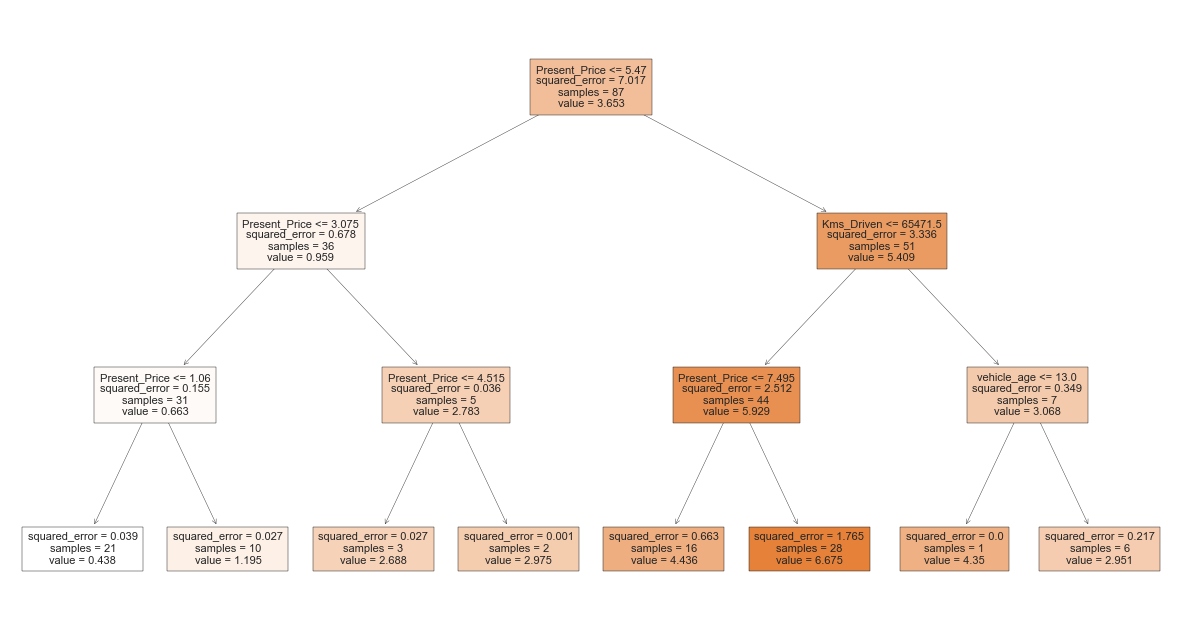

In [38]:
RF_model = RandomForestRegressor(n_estimators=250, max_depth=3, random_state=101, max_samples=0.5)

operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RF_model)]

pruned_tree = Pipeline(steps=operations)
pruned_tree.fit(X_train,y_train)

report_model(pruned_tree, 10)

# from classification;
# 1st difference is criterion='squared_error'. If you remember, in classification this hyper_parameter was gini, entropy or log_loss. 
# In regression, criterion= can take one of the values “squared_error”, “absolute_error”, “poisson”.
# But usually the model gets the best results with “squared_error”, so this value is used by default.
# The 2nd difference is that max_feature is by default sqrt in classification and 1.0 in regression. So it uses all features. 
# squared error represents mean squared error.
# An error of 0 for a leaf indicates that all cars falling on that leaf have the same price, while a value close to 0 indicates that there are cars with very close prices. 
# A high error value indicates that the leaf contains cars with very different prices. 
# samples indicates the total number of observations in the leaf (according to the boostrap method it is about 2/3 of the observations in the train data)
# value shows the average price of the observations on that leaf.
# Whenever an observation we predict falls on a leaf, the value on that leaf will be the value of the car predicted by the model.

## GridSearch

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(random_state=101))]

model = Pipeline(steps=operations)

In [41]:
param_grid = {"RF_model__criterion":["squared_error", "absolute_error"], # "poisson"
              "RF_model__n_estimators":[100, 200, 400],
              "RF_model__max_depth": [2,3],
              "RF_model__min_samples_leaf": [1, 2, 3],
              "RF_model__min_samples_split": [2, 3, 5],
              "RF_model__max_features":['auto', X.shape[1]/3, 6]} #None, auto, 1.0 all same

# Breman, who developed the random forest, recommended in his notes to try 64 as the number of trees and 1/3 of the total number of features in max_features in grid search. 
# GridsearchCV cannot prevent overfiting, so we need to limit the parameter space according to need.

In [42]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [43]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__criterion': ['squared_error',
                                                 'absolute_error'],
                         'RF_model__max_depth': [2, 3],
                         'RF_model__max_features': ['auto', 2.3333333333333335,
                                                    6],
                         'RF_model__min_samples_leaf': [1, 2, 3],
                         'RF_model__min_samples_split': [2, 3, 5],
                         'RF_model__n_estimators': [100, 200, 400]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [44]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=3, max_features=6,
                                       min_samples_leaf=3, n_estimators=200,
                                       random_state=101))])

In [45]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -0.812627
mean_train_score   -0.725885
Name: 154, dtype: object

In [46]:
train_val(grid_model, X_train, y_train, X_test, y_test)

# It seems like there exists no overfiting

,train,test
R2,0.926574,0.877984
mae,0.473048,0.610182
mse,0.534562,0.814460
rmse,0.731138,0.902474
mape,0.248543,0.246688


In [47]:
operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestRegressor(max_depth=3, 
                                                 max_features=6, 
                                                 min_samples_leaf=3,
                                                 n_estimators=200, 
                                                 random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train, 
                        y_train, 
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

# we varified that there is no overfiting

test_r2                                     0.896882
train_r2                                    0.927541
test_neg_mean_absolute_error               -0.543142
train_neg_mean_absolute_error              -0.470798
test_neg_mean_squared_error                -0.715073
train_neg_mean_squared_error               -0.527290
test_neg_root_mean_squared_error           -0.812627
train_neg_root_mean_squared_error          -0.725885
test_neg_mean_absolute_percentage_error    -0.273006
train_neg_mean_absolute_percentage_error   -0.245781
dtype: float64

## Feature Importance

In [48]:
operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestRegressor(max_depth=3, 
                                                 max_features=6, 
                                                 min_samples_leaf=3,
                                                 n_estimators=200, 
                                                 random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# feature importance let's not forget that we should use the best hyper parameters we find

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=3, max_features=6,
                                       min_samples_leaf=3, n_estimators=200,
                                       random_state=101))])

In [49]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['Fuel_Type', 'Seller_Type', 'Transmission', 'Present_Price',
       'Kms_Driven', 'Owner', 'vehicle_age'], dtype=object)

In [50]:
pipe_model["RF_model"].feature_importances_

array([0.00175627, 0.08957248, 0.        , 0.81324276, 0.01331808,
       0.        , 0.08211041])

In [51]:
df_f_i = pd.DataFrame(data=pipe_model["RF_model"].feature_importances_, 
                      index=features,
                      columns=["Feature Importance"])
df_f_i = df_f_i.sort_values("Feature Importance", ascending=False)
df_f_i

,Feature Importance
Present_Price,0.813243
Seller_Type,0.089572
vehicle_age,0.082110
Kms_Driven,0.013318
Fuel_Type,0.001756
Transmission,0.000000
Owner,0.000000


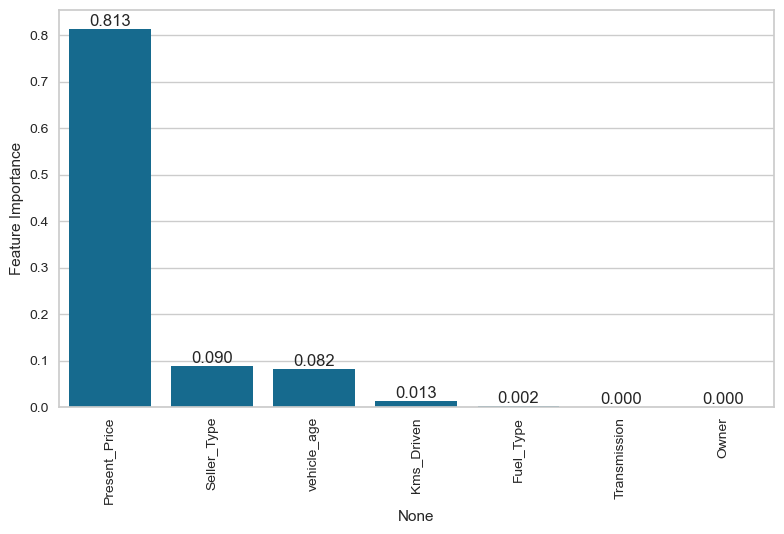

In [52]:
ax =sns.barplot(x = df_f_i.index, 
                y = 'Feature Importance', 
                data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation = 90)
plt.tight_layout()

# If a feature value is 0 after RF, it means that the feature does not really affect the prediction. Because RF gets insight from all features.

## Feature Selection

In [53]:
X2 = X[["Present_Price", "Seller_Type", "vehicle_age"]]
X2.head()

# We choose the top 3 strongest features.

,Present_Price,Seller_Type,vehicle_age
0,5.59,Dealer,9
1,9.54,Dealer,10
2,9.85,Dealer,6
3,4.15,Dealer,12
4,6.87,Dealer,9


In [54]:
X_train,X_test,y_train,y_test=train_test_split(X2, y, test_size=0.2, random_state=42)

# We determine our train and test data again according to our Yei data.

In [55]:
cat2 = ["Seller_Type"]

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat2), 
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")


operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(max_depth=3, 
                                                 max_features=6, 
                                                 min_samples_leaf=3,
                                                 n_estimators=200, 
                                                 random_state=101))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train,y_train)
train_val(pipe_model, X_train, y_train, X_test, y_test)

# We got similar scores with 3 features.

,train,test
R2,0.926473,0.883943
mae,0.474557,0.599200
mse,0.535296,0.774686
rmse,0.731639,0.880162
mape,0.252897,0.249498


In [56]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(max_depth=3, 
                                                 max_features=6, 
                                                 min_samples_leaf=3,
                                                 n_estimators=200, 
                                                 random_state=101))]

model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train, 
                        y_train, 
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

# no overfiting

test_r2                                     0.896051
train_r2                                    0.927507
test_neg_mean_absolute_error               -0.541361
train_neg_mean_absolute_error              -0.471519
test_neg_mean_squared_error                -0.718239
train_neg_mean_squared_error               -0.527550
test_neg_root_mean_squared_error           -0.807543
train_neg_root_mean_squared_error          -0.725987
test_neg_mean_absolute_percentage_error    -0.275496
train_neg_mean_absolute_percentage_error   -0.249568
dtype: float64

## Final Model

In [57]:
X2.head()

# We decided to build our final model with 3 features.

,Present_Price,Seller_Type,vehicle_age
0,5.59,Dealer,9
1,9.54,Dealer,10
2,9.85,Dealer,6
3,4.15,Dealer,12
4,6.87,Dealer,9


In [58]:
pipe_model["OrdinalEncoder"].fit_transform(X2).head()

# Let's remember again that the make_column_transform function changes our feature ordering.

,Seller_Type,Present_Price,vehicle_age
0,0.0,5.59,9
1,0.0,9.54,10
2,0.0,9.85,6
3,0.0,4.15,12
4,0.0,6.87,9


In [59]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

cat2 = ["Seller_Type"]

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans2 = make_column_transformer((ord_enc, cat2), 
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")


operations = [("OrdinalEncoder", column_trans2), 
              ("RF_model", RandomForestRegressor(max_depth=3, 
                                                 max_features=6, 
                                                 min_samples_leaf=3,
                                                 n_estimators=200, 
                                                 random_state=101,
                                                 oob_score=mean_absolute_percentage_error))] #True return r2_score

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X2, y)

# we build our pipeline and train the model.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Seller_Type'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=3, max_features=6,
                                       min_samples_leaf=3, n_estimators=200,
                                       oob_score=<function mean_absolute_percentage_error at 0x0000021506FA23E0>,
                                       random_state=101))])

## Prediction

In [60]:
samples = {"Present_Price": [7, 9.5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "vehicle_age":[7, 9]}

In [61]:
df_samples = pd.DataFrame(samples)
df_samples

# even though my model was trained with 3 features, it was able to return prediction even if I gave it all features.

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.0,25000,Petrol,Dealer,Manual,0,7
1,9.5,44000,Diesel,Individual,Automatic,1,9


In [62]:
pipe_model.predict(df_samples)

array([4.9807369 , 6.23563851])

In [63]:
pipe_model["RF_model"].oob_score_

0.2769322675199876

## ccp_alpha Hyper-Paramater

In [64]:
X = df_new.drop(columns="Selling_Price")
y = df_new.Selling_Price

# We reassigned our x and y again according to the filtered data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# we split our filtered data into train and test sets

In [65]:
cat = X.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [66]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), 
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")



RF_model = RandomForestRegressor(n_estimators=250, ccp_alpha=0.006, random_state=101, max_features=3)

operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RF_model)]

pruned_tree = Pipeline(steps=operations)
pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(ccp_alpha=0.006, max_features=3,
                                       n_estimators=250, random_state=101))])



         train      test
R2    0.984764  0.934312
mae   0.250305  0.459268
mse   0.110925  0.438470
rmse  0.333054  0.662171
mape  0.186621  0.198704




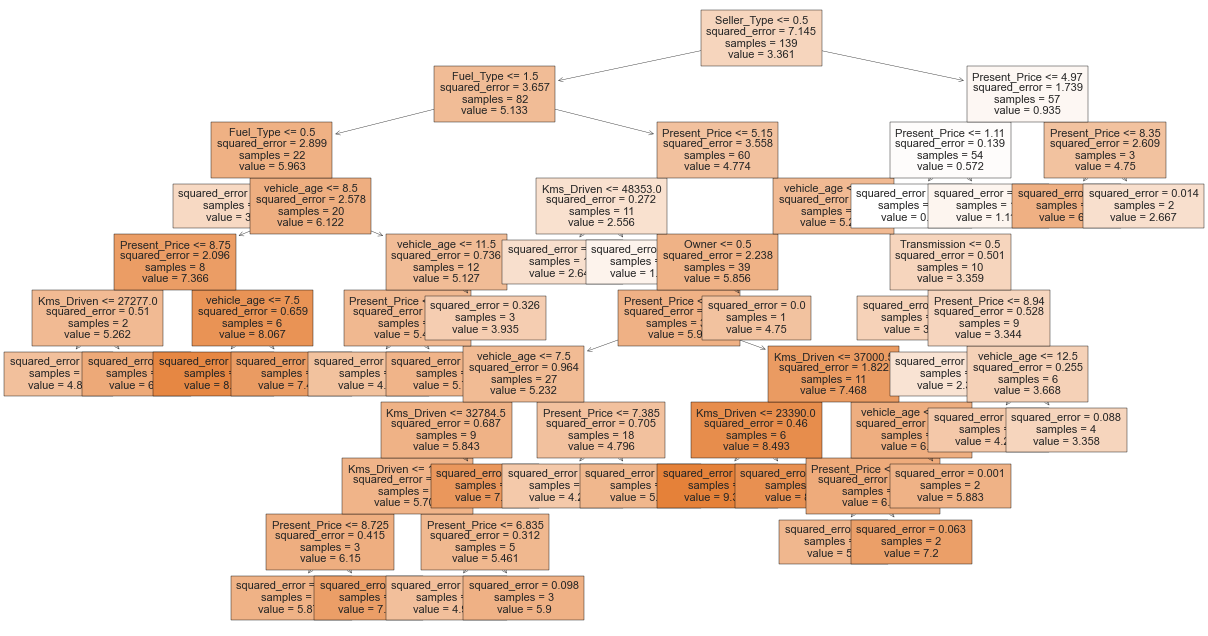

In [67]:
features = pruned_tree["OrdinalEncoder"].get_feature_names_out()
features = list(features)

def report_model(model, number_of_tree):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(15,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree], filled=True, feature_names=features, fontsize=8);

report_model(pruned_tree, 249)

In [68]:
from yellowbrick.model_selection import ValidationCurve
from ipywidgets import interact
import ipywidgets as widgets

In [69]:
# Visualization function
def validation_curve(criterion):
  operations = [("OrdinalEncoder", column_trans),
                ("RF_model", RandomForestRegressor(n_estimators=100, criterion=criterion, random_state=101,))]

  pipe_model = Pipeline(steps=operations)

  viz = ValidationCurve(
                        pipe_model, 
                        param_name="RF_model__ccp_alpha", 
                        param_range=np.linspace(0, 0.1, 25),
                        logx=False, 
                        cv=3, 
                        scoring="neg_mean_absolute_percentage_error", 
                        n_jobs=-1
  )

  viz.fit(X_train, y_train)
  viz.show()

# Create a dropdown widget for criterion selection
criterion_widget = widgets.Dropdown(options=['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                                    value='absolute_error',
                                    description='Criterion:',
                                    disabled=False)

# Use interact to create the interactive widget
interact(validation_curve, criterion=criterion_widget)

interactive(children=(Dropdown(description='Criterion:', index=2, options=('squared_error', 'friedman_mse', 'a…

<function __main__.validation_curve(criterion)>

END OF THE PROJECT